In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [3]:
full_data = pd.read_csv(r"/content/drive/MyDrive/Titanic Dataset/titanic.csv")
test_data = pd.read_csv(r"/content/drive/MyDrive/Titanic Dataset/test.csv")
train_data = pd.read_csv(r"/content/drive/MyDrive/Titanic Dataset/train.csv")

In [4]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [6]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


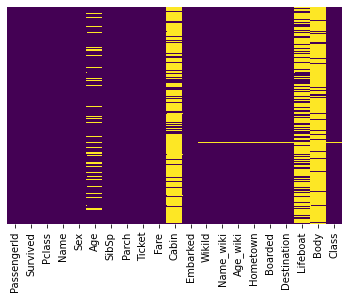

In [7]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

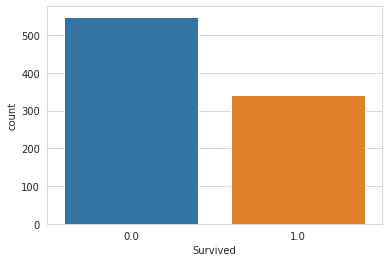

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data= train_data)

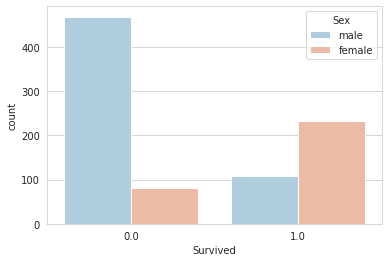

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data= train_data,hue='Sex',palette='RdBu_r')

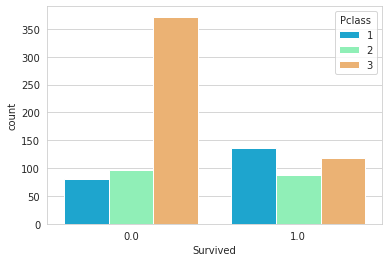

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data= train_data,hue='Pclass',palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


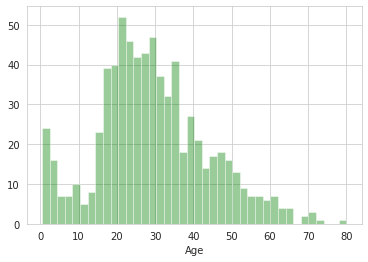

In [11]:
sns.distplot(train_data['Age'].dropna(),kde=False,color='green',bins=40)

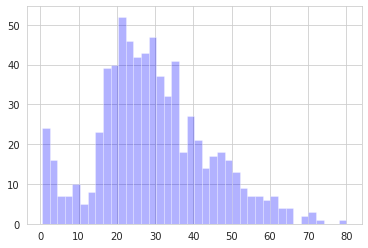

In [12]:
train_data['Age'].hist(bins=40,color='blue',alpha=0.3)

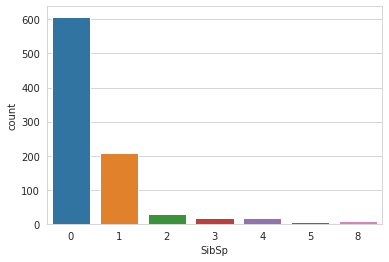

In [13]:
sns.countplot(x='SibSp',data=train_data)

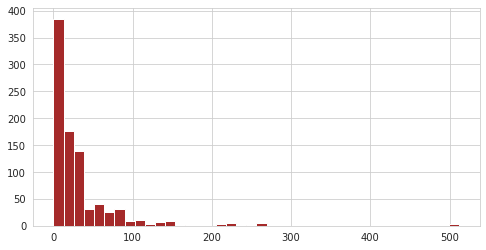

In [14]:
train_data['Fare'].hist(color='brown',bins=40,figsize=(8,4))

In [15]:
import cufflinks as cf 
cf.go_offline()

In [16]:
train_data['Fare'].iplot(kind='hist',bins=30,color='green')

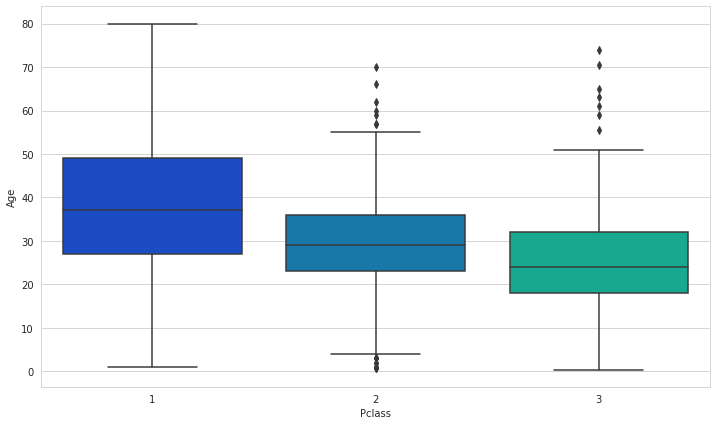

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

In [18]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age


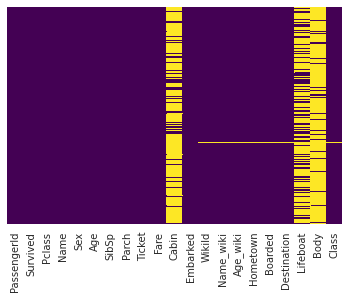

In [19]:
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [21]:
train_data['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F33            3
              ..
C49            1
C95            1
E17            1
B79            1
B42            1
Name: Cabin, Length: 147, dtype: int64

In [22]:
train_data.drop(["Cabin","Lifeboat","Body","Hometown","Destination","Ticket"],axis=1,inplace=True)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  WikiId       889 non-null    float64
 11  Name_wiki    889 non-null    object 
 12  Age_wiki     887 non-null    float64
 13  Boarded      889 non-null    object 
 14  Class        889 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 104.5+ KB


In [24]:
train_data.dropna(axis = 0,inplace = True)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  885 non-null    int64  
 1   Survived     885 non-null    float64
 2   Pclass       885 non-null    int64  
 3   Name         885 non-null    object 
 4   Sex          885 non-null    object 
 5   Age          885 non-null    float64
 6   SibSp        885 non-null    int64  
 7   Parch        885 non-null    int64  
 8   Fare         885 non-null    float64
 9   Embarked     885 non-null    object 
 10  WikiId       885 non-null    float64
 11  Name_wiki    885 non-null    object 
 12  Age_wiki     885 non-null    float64
 13  Boarded      885 non-null    object 
 14  Class        885 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 110.6+ KB


In [26]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,446.467797,0.383051,2.310734,29.027311,0.525424,0.384181,31.948625,665.835028,29.275333,2.308475
std,257.171577,0.486405,0.834459,13.233713,1.105661,0.808173,49.357647,381.071079,13.899318,0.836651
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.420000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000,337.000000,20.000000,2.000000
50%,447.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,672.000000,28.000000,3.000000
75%,669.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,998.000000,38.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1314.000000,74.000000,3.000000


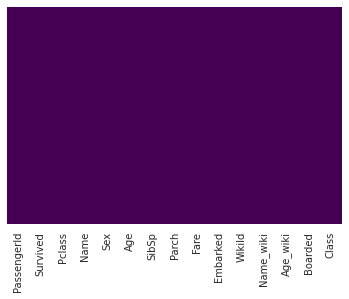

In [27]:
train_data['Age']=train_data[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,WikiId,Name_wiki,Age_wiki,Boarded,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,691.0,"Braund, Mr. Owen Harris",22.0,Southampton,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,Cherbourg,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,865.0,"Heikkinen, Miss Laina",26.0,Southampton,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,Southampton,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,627.0,"Allen, Mr. William Henry",35.0,Southampton,3.0


In [29]:
train_data.dropna(inplace=True)

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  885 non-null    int64  
 1   Survived     885 non-null    float64
 2   Pclass       885 non-null    int64  
 3   Name         885 non-null    object 
 4   Sex          885 non-null    object 
 5   Age          885 non-null    float64
 6   SibSp        885 non-null    int64  
 7   Parch        885 non-null    int64  
 8   Fare         885 non-null    float64
 9   Embarked     885 non-null    object 
 10  WikiId       885 non-null    float64
 11  Name_wiki    885 non-null    object 
 12  Age_wiki     885 non-null    float64
 13  Boarded      885 non-null    object 
 14  Class        885 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 110.6+ KB


In [31]:
pd.get_dummies(train_data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [32]:
sex=pd.get_dummies(train_data['Sex'],drop_first=True)
embark=pd.get_dummies(train_data['Embarked'],drop_first=True)

In [33]:
train_data.drop(['Sex','PassengerId','Name','Parch','Name_wiki','WikiId','Age_wiki','Boarded','Class'],axis=1,inplace=True)

In [34]:
train_data.head()

,Survived,Pclass,Age,SibSp,Fare,Embarked
0,0.0,3,22.0,1,7.2500,S
1,1.0,1,38.0,1,71.2833,C
2,1.0,3,26.0,0,7.9250,S
3,1.0,1,35.0,1,53.1000,S
4,0.0,3,35.0,0,8.0500,S


In [35]:
train_data=pd.concat([train_data,sex,embark],axis=1)

In [36]:
train_data.head()

,Survived,Pclass,Age,SibSp,Fare,Embarked,male,Q,S
0,0.0,3,22.0,1,7.2500,S,1,0,1
1,1.0,1,38.0,1,71.2833,C,0,0,0
2,1.0,3,26.0,0,7.9250,S,0,0,1
3,1.0,1,35.0,1,53.1000,S,0,0,1
4,0.0,3,35.0,0,8.0500,S,1,0,1


In [37]:
train_data.drop('Survived',axis=1).head()

,Pclass,Age,SibSp,Fare,Embarked,male,Q,S
0,3,22.0,1,7.2500,S,1,0,1
1,1,38.0,1,71.2833,C,0,0,0
2,3,26.0,0,7.9250,S,0,0,1
3,1,35.0,1,53.1000,S,0,0,1
4,3,35.0,0,8.0500,S,1,0,1


In [38]:
train_data['Survived'].head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [39]:
train_data.Embarked.fillna("E",inplace = True)
embark_dict = {"C":1,"Q":2,"S" :3,"E":0}
train_data.Embarked.replace(embark_dict,inplace = True)



In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,X_test,y_train,Y_test= train_test_split(train_data.drop('Survived',axis=1),
                                                train_data['Survived'],test_size=0.30,
                                                random_state=1)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
prediction=logmodel.predict(X_test)
X_test

,Pclass,Age,SibSp,Fare,Embarked,male,Q,S
526,2,50.0,0,10.5000,3,0,0,1
316,2,24.0,1,26.0000,3,0,0,1
887,1,19.0,0,30.0000,3,0,0,1
322,2,30.0,0,12.3500,2,0,1,0
812,2,35.0,0,10.5000,3,1,0,1
...,...,...,...,...,...,...,...,...
439,2,31.0,0,10.5000,3,1,0,1
241,3,24.0,1,15.5000,2,0,1,0
692,3,24.0,0,56.4958,3,1,0,1
94,3,59.0,0,7.2500,3,1,0,1


In [45]:
prediction

array([1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0.

In [49]:
from sklearn.metrics import confusion_matrix

In [55]:
accuracy=confusion_matrix(Y_test,prediction)

In [56]:
accuracy

array([[134,  27],
       [ 31,  74]])

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy=accuracy_score(Y_test,prediction)
accuracy

0.7819548872180451